## Hr Data Analytics
--> This dataset contains information about employees who worked in a company.

#### Content
This dataset contains columns: Satisfactory Level, Number of Project, Average Monthly Hours, Time Spend Company, Promotion Last 5 Years, Department, Salary

Acknowledgements
You can download, copy and share this dataset for analysis and Predictions employees Behaviour.

Inspiration
Answer the following questions would be worthy
1. Do Exploratory Data analysis to figure out which variables have a direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing the impact of employee salaries on retention
3. Plot bar charts showing a correlation between department and employee retention
4. Now build a logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model



In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [5]:
#To read first 5 data entries
df = pd.read_csv(r"C:\Users\Aaditya Adyot\Downloads\HR Analytics\data\HR_comma_sep.csv")
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
#To read last 5 entries
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [7]:
#to see random entries in the dataframe
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
5137,0.64,0.97,2,226,3,1,0,0,sales,medium
9746,0.96,0.69,4,156,5,0,0,0,support,high
8821,0.93,0.53,3,257,2,1,0,0,technical,low
7897,0.78,0.87,4,178,3,0,0,0,technical,medium
9654,0.68,0.61,4,227,3,0,0,0,technical,medium


In [8]:
# to check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### Observations
1. there seems no null value in the dataset
2. there are total 6 integer features, 2 floating type features and 2 categorical features

In [9]:
# To check the null values in the dataset
df.isnull().sum().sum()

0

In [10]:
#to check the duplicate entries in the dataset
df[df.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [11]:
df.duplicated().sum()

3008

#### Observation:
1. There are 3008 duplicate values in the dataset

We must remove these duplicate values

In [12]:
# Dropping duplicate values
df.drop_duplicates(inplace= True)

In [13]:
# Now check the describe function to see the stastistics of the numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,11991.0,0.629658,0.241070,0.09,0.48,0.66,0.82,1.0
last_evaluation,11991.0,0.716683,0.168343,0.36,0.57,0.72,0.86,1.0
number_project,11991.0,3.802852,1.163238,2.00,3.00,4.00,5.00,7.0
average_montly_hours,11991.0,200.473522,48.727813,96.00,157.00,200.00,243.00,310.0
time_spend_company,11991.0,3.364857,1.330240,2.00,3.00,3.00,4.00,10.0
Work_accident,11991.0,0.154282,0.361234,0.00,0.00,0.00,0.00,1.0
left,11991.0,0.166041,0.372133,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,11991.0,0.016929,0.129012,0.00,0.00,0.00,0.00,1.0


### In this dataset we will classify and build the models on employees 
# "Will the employee with the given condition will leave the company or not"

In [14]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [15]:
# To check the unique values in Departments features
df['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [16]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [17]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
salary = encoder.fit_transform(df['salary'])

In [19]:
df['salary'] = salary

In [20]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


#### Here Low salary has been encoded as 1, Medium Salary as 2 and High salary as 3

In [21]:
df.salary.value_counts()

1    5740
2    5261
0     990
Name: salary, dtype: int64

#### Observations:
1. EMployee with low salary are 5740
2. No. of employees with medium salary are 5261
3. No. of employee with high salary are 990

In [22]:
df.Department.value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: Department, dtype: int64

#### Observations
1. Sales departments has high no. of employees
2. Technical employees are at second and Support employees are at third position in terms of no. of employees.
3. Employees thoese who are in the management are very less in number.

# EDA (Exploratory data analysis)

In [23]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [24]:
# To see out of 11991 no. of employee how many employees have left the company 
# we know that in the left feature, 1 represent "left the comapny" and 0 represents "still working"

In [25]:
df.left.value_counts()

0    10000
1     1991
Name: left, dtype: int64

Text(0.5, 0, 'Employee Retention (1- left, 0- Working)')

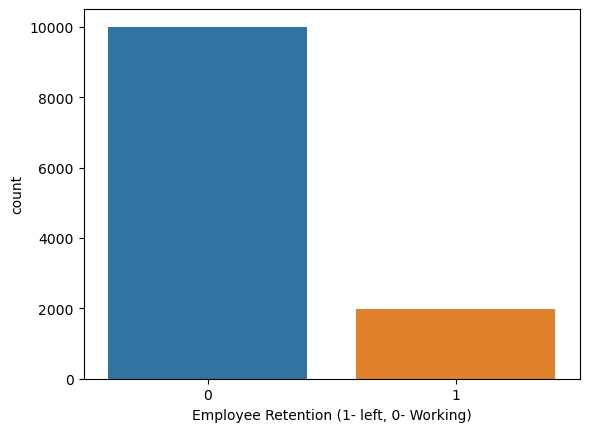

In [26]:
sns.countplot(data= df, x='left')
plt.xlabel("Employee Retention (1- left, 0- Working)")

#### Observation
1. There are 1191 employees those who left the company and 10000 employees are still working.

In [27]:
# To check the employees those who left the company, how many of them got the promotions in last 5 years

In [28]:
df.groupby('left')[['promotion_last_5years']].sum()

,promotion_last_5years
left,
0,195
1,8


<Axes: xlabel='left', ylabel='count'>

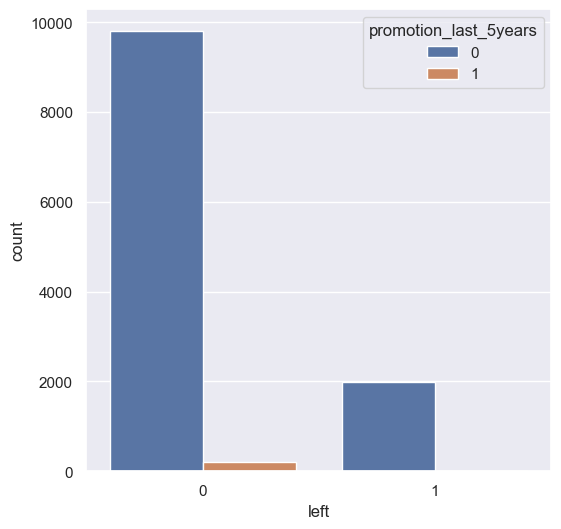

In [29]:
sns.set(rc={'figure.figsize': (6, 6)})
sns.countplot(data=df, x='left', hue= 'promotion_last_5years')

#### Observations:
1. There are 8 no. of employees those who got the promotions has left the company
2. There are 195 employees those who got the promotions and still they are working in the same company.

In [30]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,0
11996,0.74,0.95,5,266,10,0,0,1,management,0
11997,0.85,0.54,3,185,10,0,0,1,management,0
11998,0.33,0.65,3,172,10,0,0,1,marketing,0


In [31]:
# To check which department has high attrition

In [32]:
result= df.groupby('Department')[['left']].sum()
result.sort_values(ascending = False, by='left')

,left
Department,
sales,550
technical,390
support,312
IT,158
hr,113
marketing,112
product_mng,110
accounting,109
RandD,85


In [33]:
df.groupby('Department')[['left']].sum()['left'].sum()

1991

In [34]:
### Bar Chart Showing Correlation between department and employee retention

<Axes: xlabel='Department'>

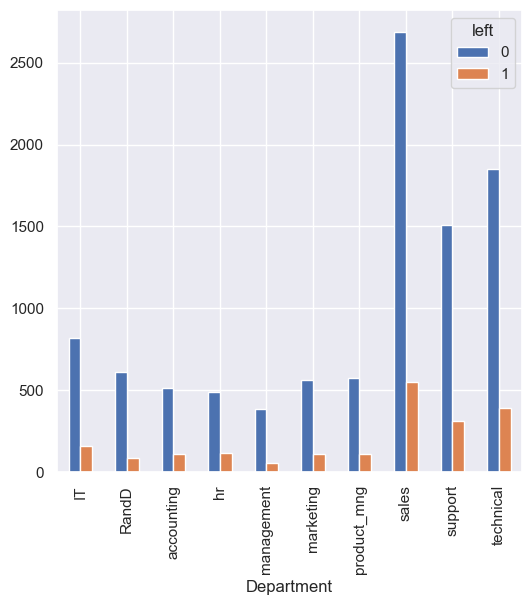

In [35]:
pd.crosstab(df.Department, df.left).plot(kind='bar')

#### Observation
1. Sales department has high attrition of 550 employees
2. Technical department has 390 employees attrition
3. Support department has 312 employee attrition.

In [36]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,0
11996,0.74,0.95,5,266,10,0,0,1,management,0
11997,0.85,0.54,3,185,10,0,0,1,management,0
11998,0.33,0.65,3,172,10,0,0,1,marketing,0


In [37]:
# To check the employee salary status (High, Medium or Low) when they left the company

In [38]:
df.groupby('salary')[['left']].sum()

,left
salary,
0,48
1,1174
2,769


<Axes: xlabel='left', ylabel='count'>

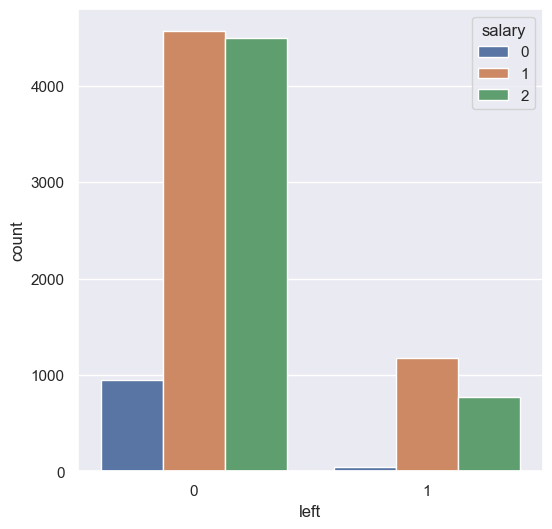

In [39]:
sns.countplot(data=df, x= 'left', hue= 'salary')

<Axes: xlabel='salary', ylabel='count'>

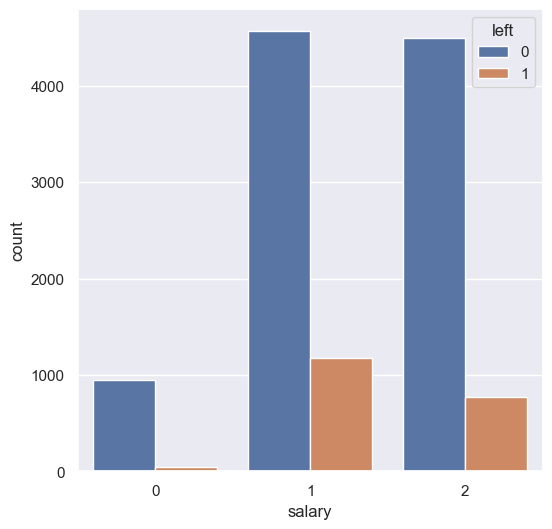

In [40]:
sns.countplot(data=df, hue= 'left', x= 'salary')

#### Observation
1. No. of employees left who's salary was low are 48.
2. No. of employees left who's salary was medium are 1174
3. No. of employees left who's salary was high are 769
4. employees who's salary were medium, count of attrition is high.

In [41]:
# To check employees those who left the company, How many years they had served.

In [42]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [43]:
df.groupby('time_spend_company')[['left']].sum()

,left
time_spend_company,
2,31
3,874
4,495
5,482
6,109
7,0
8,0
10,0


<Axes: xlabel='time_spend_company', ylabel='count'>

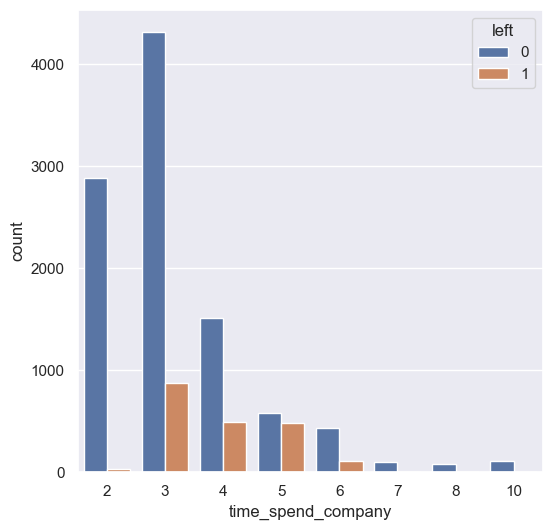

In [44]:
sns.countplot(data=df, x= 'time_spend_company', hue= 'left')

#### Observation
Trend shows that...
1. Employees those who spent 3 years in a company has high chance of leaving the company
2. There are almost equal chance of leaving a company when an employee is in the company for 4-5 years.
3. There are very less employees those who leaves a company in the 2 year of the employment.
4. There are no attrition rate/ or the employee did not leave the company in 7, 8 and 10 year.

In [45]:
# Ploting bar charts showing the impact of employee salaries on retention

<Axes: xlabel='salary'>

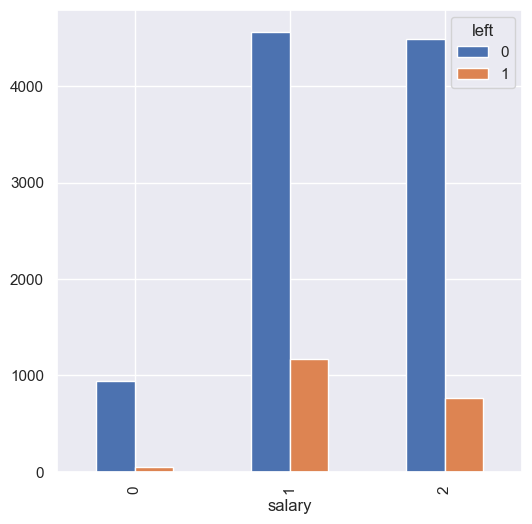

In [46]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

In [47]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [48]:
# Now to check the outliers in the dataset by plotting boxplot

In [49]:
Numerical_col= [feature for feature in df.columns if df[feature].dtypes !='O']
Numerical_col

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'salary']

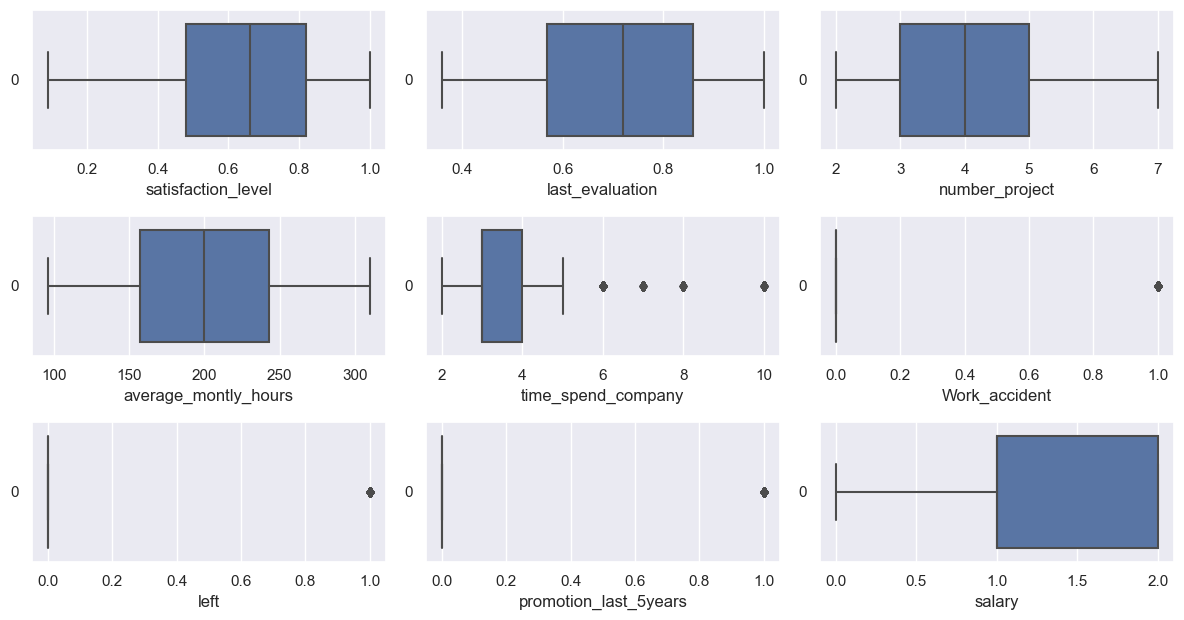

In [50]:
plt.figure(figsize = (12,10))
for i in range(0, len(Numerical_col)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(df[Numerical_col[i]], orient= 'h')
    plt.xlabel(Numerical_col[i])
    plt.tight_layout()

##### Observation
1. Most of the feature does not have the outliers.
2. there are one feature "time_spend_company" where we can see the outlier, We should not remove them as they are good for the dataset.

In [51]:
# Now lets see the distribution of the dataset, wheather it is following normal distribution or non-linear distribution

<Figure size 200x300 with 0 Axes>

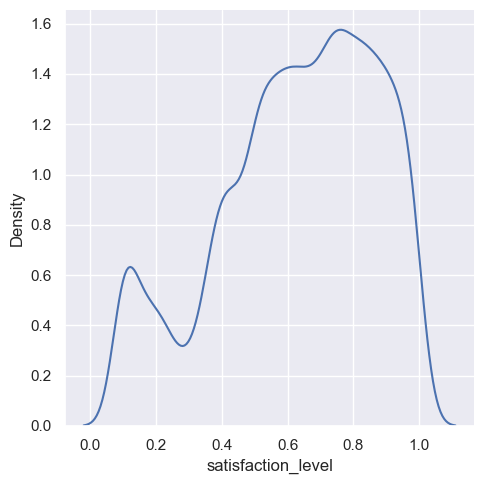

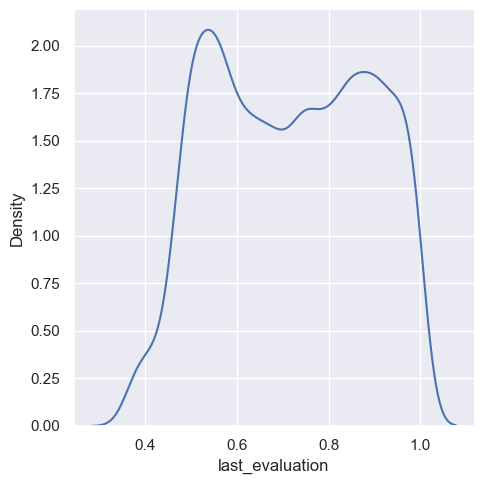

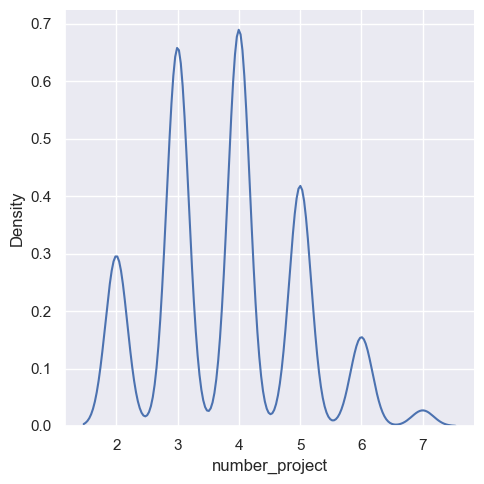

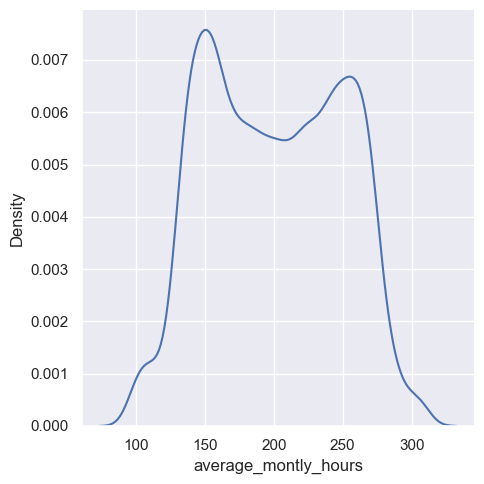

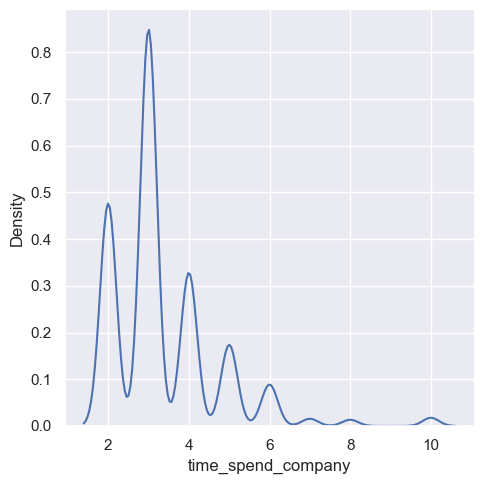

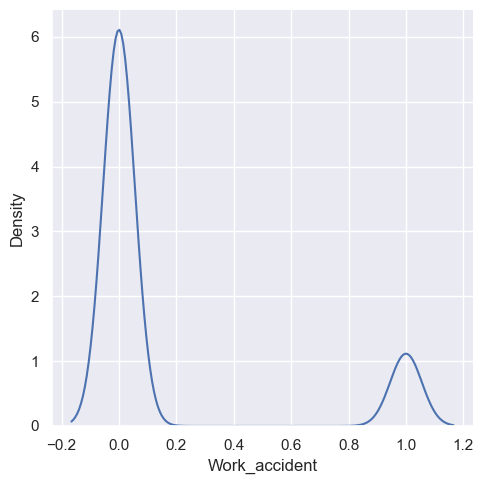

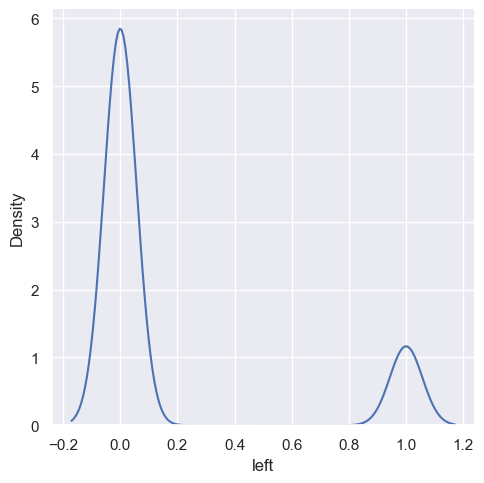

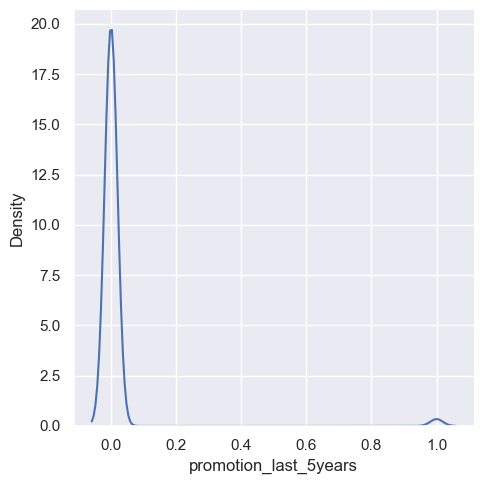

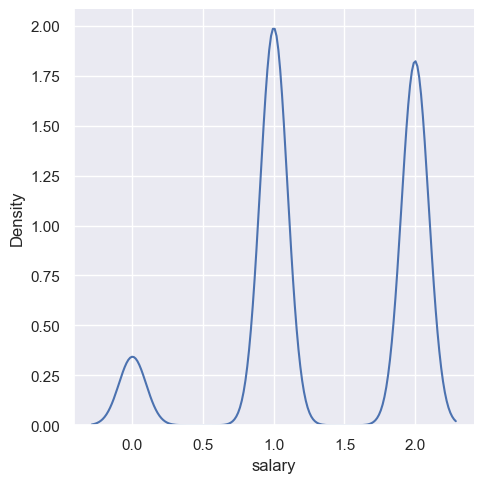

In [52]:
plt.figure(figsize = (2,3))
for i in range(0, len(Numerical_col)):
    #plt.subplot(3,3,i+1)
    sns.displot(x= df[Numerical_col[i]], kind= 'kde')
    plt.xlabel(Numerical_col[i])
    plt.tight_layout()
plt.show()

##### Observation
1. features does not follow normal distribution.

In [53]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,0.007216
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,0.007091
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,0.003199
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,0.002727
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,0.000369
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,-0.003654
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,0.004224
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,0.004832
salary,0.007216,0.007091,0.003199,0.002727,0.000369,-0.003654,0.004224,0.004832,1.000000


<Axes: title={'center': 'Plotting Correlation through Heat Map'}>

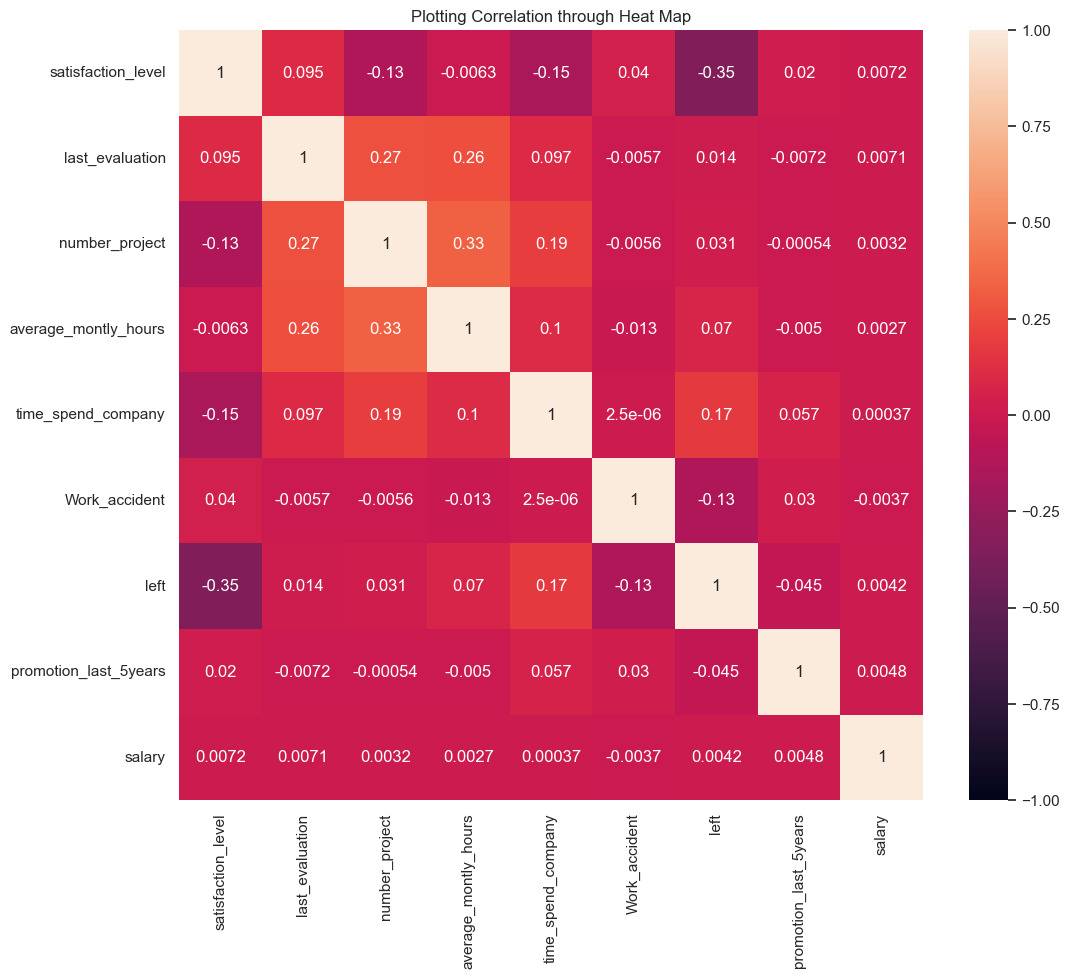

In [64]:
sns.set(rc= {'figure.figsize': (12,10)})
plt.title("Plotting Correlation through Heat Map")
sns.heatmap(df[Numerical_col].corr(), annot= True, vmin=-1, vmax= 1)

##### Observation
1. Attrition is highly negatively corelatted with Promotion, satisfaction level 
2. Attrition is highly positively corelatted with salary and num. of project.

In [55]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


##### Now lets proceed a head with one-hot-encoding of Departments

In [56]:
x = pd.get_dummies(df['Department'])
x
df= pd.concat([df, x], axis=1)
df.drop('Department', axis=1, inplace= True)

In [57]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,0,0,0,0,0,1,0,0,0,0,0
11996,0.74,0.95,5,266,10,0,0,1,0,0,0,0,0,1,0,0,0,0,0
11997,0.85,0.54,3,185,10,0,0,1,0,0,0,0,0,1,0,0,0,0,0
11998,0.33,0.65,3,172,10,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [58]:
df.dtypes


satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
salary                     int32
IT                         uint8
RandD                      uint8
accounting                 uint8
hr                         uint8
management                 uint8
marketing                  uint8
product_mng                uint8
sales                      uint8
support                    uint8
technical                  uint8
dtype: object

In [59]:
# Now all the above features are converted as Numerical feature.

In [60]:
##### Lets save this in new CSV

In [61]:
df.to_csv('data/Dataset cleaned.csv', index = False)